In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Import LabelEncoder

# Load the dataset
data = pd.read_csv("/content/Breast_Cancer.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Separate numerical and categorical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns
X_numerical = X[numerical_features]
X_categorical = X[categorical_features]

# Handle missing values in numerical features
imputer_numerical = SimpleImputer(strategy='mean')
X_numerical = imputer_numerical.fit_transform(X_numerical)

# Handle missing values in categorical features
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_categorical = imputer_categorical.fit_transform(X_categorical)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical = encoder.fit_transform(X_categorical)

# Combine numerical and encoded categorical features
X = np.concatenate([X_numerical, X_categorical], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # Now y_train is numerical

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.09096975703244212
R-squared: 0.24021925637483044


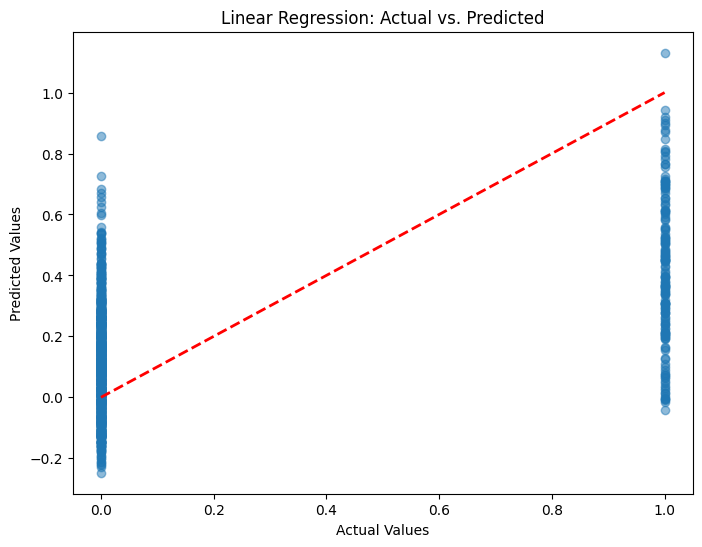

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt # Import matplotlib for plotting

# ... (Your existing code for data loading, preprocessing, model training, and prediction) ...

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha controls transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add a diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

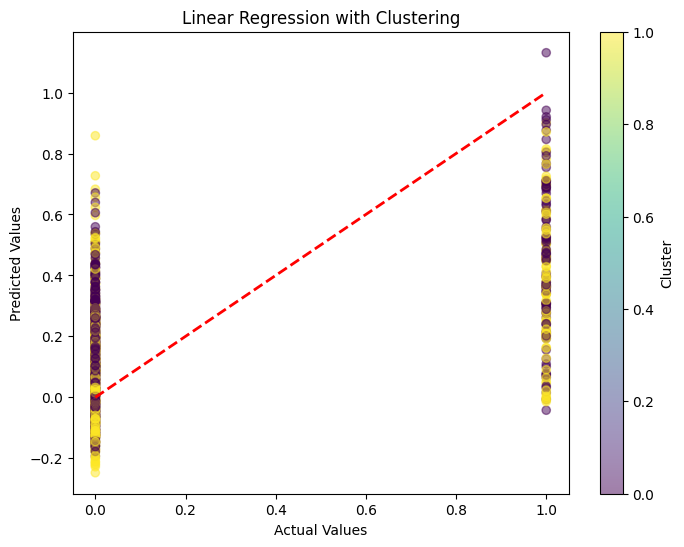

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import KMeans for clustering

# ... (Your existing code for data loading, preprocessing, model training, and prediction) ...

# Assuming 'Age' is a relevant feature for clustering
X_clustering = X_test[:, 0]  # Select the 'Age' column (index 0) for clustering

# Perform KMeans clustering (e.g., with 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_clustering.reshape(-1,1)) # Reshape for KMeans
cluster_labels = kmeans.labels_

# Create a scatter plot with cluster coloring
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=cluster_labels, cmap='viridis', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression with Clustering")
plt.colorbar(label="Cluster") # Add colorbar to show cluster labels
plt.show()

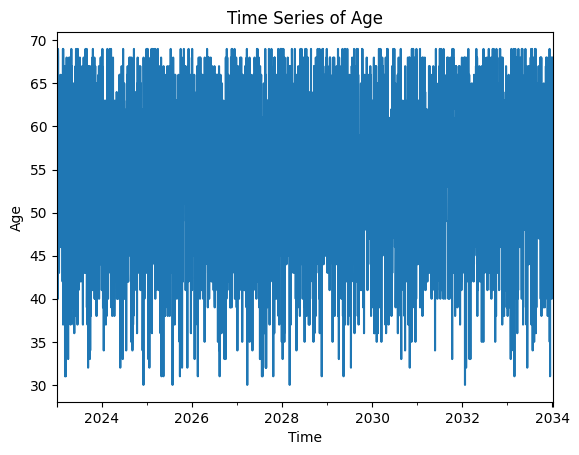

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/Breast_Cancer.csv')

# Generate a synthetic time index (daily in this case)
data['Time'] = pd.date_range(start='2023-01-01', periods=len(data), freq='D')
data.set_index('Time', inplace=True)

# Create time series plot for 'Age'
data['Age'].plot()
plt.xlabel("Time")
plt.ylabel("Age")
plt.title("Time Series of Age")
plt.show()